https://www.airlinequality.com/airline-reviews/british-airways/

## Dataset: Airline Reviews
Gồm 13 trường:
 - Aircraft: String, phi cơ
 - Cabin Staff Service: Int, dịch vụ nhân viên (Rating)
 - Date Flown: String, ngày bay
 - Food & Beverages: Float, đồ ăn & đồ uống (Rating)
 - Ground Service: Int, dịch vụ mặt đất
 - Inflight Entertainment: Float, dịch vụ giải trí bay (Rating)
 - Recommended: String, đề xuất
 - Route: String, tuyến đường
 - Seat Comfort: Int, độ thoải mái chỗ ngồi (Rating)
 - Seat Type: String, loại ghế
 - Type Of Traveller: String, loại khách du lịch
 - Value For Money: Int, giá trị đồng tiền (Rating)
 - Wifi & Connectivity: Float, wifi & kết nối

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Đọc file SmallDS

In [5]:
df = pd.read_csv('raw_data_1k.csv')
df['Recommended'] = df['Recommended'].replace({'yes': 1, 'no': 0})
df_raw = df.copy()
df = df.drop(df.columns[0], axis=1)
df.head(6)

,Aircraft,Cabin Staff Service,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Route,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity
0,NaN,3,April 2023,3.0,1,3.0,0,New York to London,4,Economy Class,Business,1,4.0
1,Boeing 787,2,April 2023,1.0,3,5.0,0,Singapore to London,4,Business Class,Couple Leisure,1,1.0
2,Boeing 777,2,April 2023,1.0,3,1.0,0,Seattle to Zagreb via London,3,Premium Economy,Couple Leisure,2,1.0
3,Boeing 777,1,April 2023,2.0,1,3.0,0,"Bangalore to Toronto via London,",2,Premium Economy,Family Leisure,1,NaN
4,Dreamliner,1,February 2023,1.0,1,3.0,0,London to Denver,2,Economy Class,Family Leisure,2,1.0
5,A350,5,April 2023,4.0,4,3.0,1,London to Hong Kong,4,Premium Economy,Solo Leisure,4,NaN


### Đọc file BigDS

In [6]:
df_10k = pd.read_csv('raw_data_10k.csv')
df_10k['Recommended'] = df_10k['Recommended'].replace({'yes': 1, 'no': 0})
df_10k_raw = df_10k.copy()
df_10k = df_10k.drop(df_10k.columns[0], axis=1)
df_10k.head(6)

,Aircraft,Airline Name,Cabin Staff Service,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Route,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity
0,NaN,adria-airways,1,September 2019,1.0,1,1.0,0,Sofia to Amsterdam via Ljubljana,1,Economy Class,Couple Leisure,1,1.0
1,CR 900,adria-airways,1,September 2019,1.0,1,1.0,0,Sarajevo to Ljubljana,1,Economy Class,Couple Leisure,1,1.0
2,Bombardier CRJ,adria-airways,1,August 2019,1.0,1,1.0,0,Timisoara to Munich,1,Economy Class,Solo Leisure,1,1.0
3,NaN,adria-airways,2,August 2019,1.0,1,1.0,0,Pristina to Zürich via Ljubliana,1,Economy Class,Solo Leisure,1,1.0
4,NaN,adria-airways,1,March 2018,1.0,1,1.0,0,Ljubljana to Frankfurt,2,Economy Class,Solo Leisure,1,1.0
5,CR9,adria-airways,5,April 2017,4.0,5,4.0,1,Ljubljana to Zurich,5,Economy Class,Business,4,NaN


# Mô tả các thuộc tính của SmallDS và BigDS

In [7]:
num_samples = df.shape[0]
num_features = df.shape[1]
print("Số mẫu của SmallDS là:", num_samples)
print("Số đặc trưng của SmallDS là:", num_features)

Số mẫu của SmallDS là: 1437
Số đặc trưng của SmallDS là: 13


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 0 to 1436
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft                1251 non-null   object 
 1   Cabin Staff Service     1437 non-null   int64  
 2   Date Flown              1437 non-null   object 
 3   Food & Beverages        1434 non-null   float64
 4   Ground Service          1437 non-null   int64  
 5   Inflight Entertainment  1409 non-null   float64
 6   Recommended             1437 non-null   int64  
 7   Route                   1437 non-null   object 
 8   Seat Comfort            1437 non-null   int64  
 9   Seat Type               1437 non-null   object 
 10  Type Of Traveller       1437 non-null   object 
 11  Value For Money         1437 non-null   int64  
 12  Wifi & Connectivity     526 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 146.1+ KB


In [9]:
df.isnull().sum()

Aircraft                  186
Cabin Staff Service         0
Date Flown                  0
Food & Beverages            3
Ground Service              0
Inflight Entertainment     28
Recommended                 0
Route                       0
Seat Comfort                0
Seat Type                   0
Type Of Traveller           0
Value For Money             0
Wifi & Connectivity       911
dtype: int64

In [10]:
df.describe()

,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Seat Comfort,Value For Money,Wifi & Connectivity
count,1437.000000,1434.000000,1437.000000,1409.000000,1437.000000,1437.000000,1437.000000,526.000000
mean,3.326374,2.723849,3.046625,2.693400,0.421712,2.910230,2.774530,1.952471
std,1.456885,1.444639,1.390346,1.390294,0.494005,1.371573,1.417398,1.373083
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,1.000000
50%,4.000000,3.000000,3.000000,3.000000,0.000000,3.000000,3.000000,1.000000
75%,5.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,1.000000,5.000000,5.000000,5.000000


In [11]:
df_10k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10733 entries, 0 to 10732
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft                6160 non-null   object 
 1   Airline Name            10733 non-null  object 
 2   Cabin Staff Service     10733 non-null  int64  
 3   Date Flown              10733 non-null  object 
 4   Food & Beverages        10684 non-null  float64
 5   Ground Service          10733 non-null  int64  
 6   Inflight Entertainment  10578 non-null  float64
 7   Recommended             10733 non-null  int64  
 8   Route                   10731 non-null  object 
 9   Seat Comfort            10733 non-null  int64  
 10  Seat Type               10733 non-null  object 
 11  Type Of Traveller       10733 non-null  object 
 12  Value For Money         10733 non-null  int64  
 13  Wifi & Connectivity     6991 non-null   float64
dtypes: float64(3), int64(5), object(6)
mem

In [12]:
df_10k.isnull().sum()

Aircraft                  4573
Airline Name                 0
Cabin Staff Service          0
Date Flown                   0
Food & Beverages            49
Ground Service               0
Inflight Entertainment     155
Recommended                  0
Route                        2
Seat Comfort                 0
Seat Type                    0
Type Of Traveller            0
Value For Money              0
Wifi & Connectivity       3742
dtype: int64

In [13]:
df_10k.describe()

,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Seat Comfort,Value For Money,Wifi & Connectivity
count,10733.000000,10684.000000,10733.000000,10578.000000,10733.000000,10733.000000,10733.000000,6991.000000
mean,2.882139,2.448615,2.519799,2.400454,0.355632,2.619398,2.505264,1.857531
std,1.588720,1.493622,1.566368,1.457140,0.478727,1.458017,1.559569,1.335983
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
50%,3.000000,2.000000,2.000000,2.000000,0.000000,3.000000,2.000000,1.000000
75%,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,1.000000,5.000000,5.000000,5.000000


In [14]:
df['Average'] = df[['Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Seat Comfort', 'Value For Money', 'Wifi & Connectivity']].mean(axis=1).round(1)
df_10k['Average'] = df_10k[['Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Seat Comfort', 'Value For Money', 'Wifi & Connectivity']].mean(axis=1).round(1)

# Sự phân bố đề xuất của hành khách trên 2 tập DS

<AxesSubplot:xlabel='Recommended', ylabel='count'>

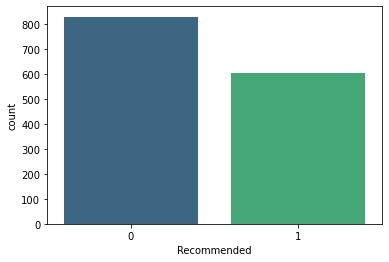

In [15]:
sns.countplot(x='Recommended', data=df, palette='viridis')

<AxesSubplot:xlabel='Recommended', ylabel='count'>

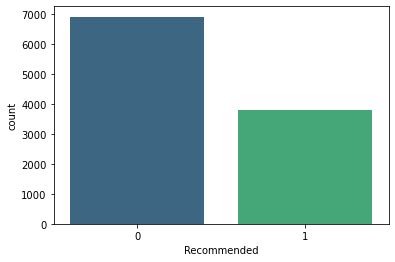

In [16]:
sns.countplot(x='Recommended', data=df_10k, palette='viridis')

# Top 10 phi cơ được đánh giá nhiều nhất trên 2 tập DS

C:\Users\DELL\AppData\Local\Temp\ipykernel_13052\3022422033.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_5_aircrafts['Aircraft'] = pd.Categorical(df_top_5_aircrafts['Aircraft'], categories=top_5_aircrafts, ordered=True)


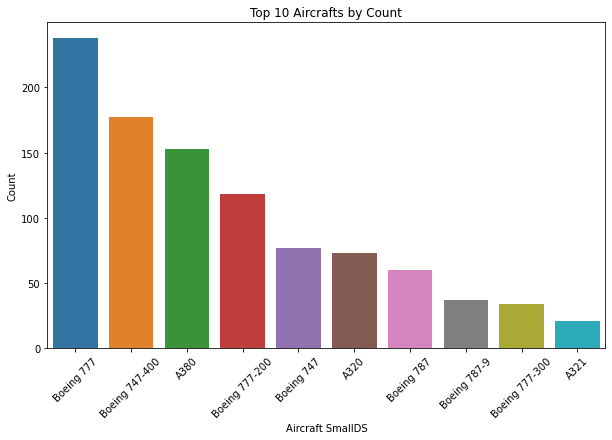

In [17]:
top_5_aircrafts = df['Aircraft'].value_counts().nlargest(10).sort_values(ascending=False).index

df_top_5_aircrafts = df[df['Aircraft'].isin(top_5_aircrafts)]
df_top_5_aircrafts['Aircraft'] = pd.Categorical(df_top_5_aircrafts['Aircraft'], categories=top_5_aircrafts, ordered=True)
df_top_5_aircrafts = df_top_5_aircrafts.sort_values('Aircraft')

plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_5_aircrafts, x='Aircraft')
plt.xlabel('Aircraft SmallDS')
plt.ylabel('Count')
plt.title('Top 10 Aircrafts by Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13052\418401093.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_5_aircrafts['Aircraft'] = pd.Categorical(df_top_5_aircrafts['Aircraft'], categories=top_5_aircrafts, ordered=True)


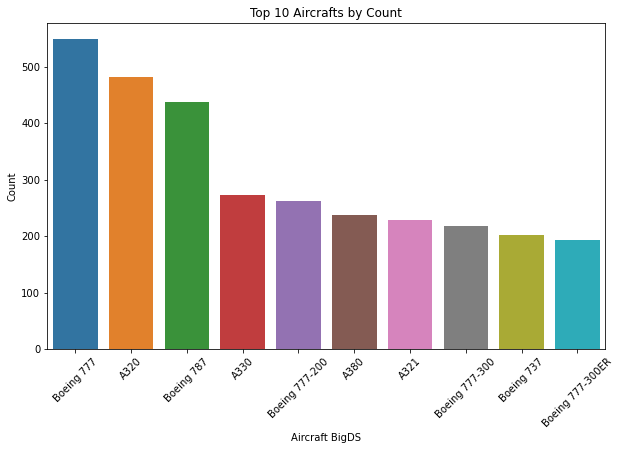

In [18]:
top_5_aircrafts = df_10k['Aircraft'].value_counts().nlargest(10).sort_values(ascending=False).index

df_top_5_aircrafts = df_10k[df_10k['Aircraft'].isin(top_5_aircrafts)]
df_top_5_aircrafts['Aircraft'] = pd.Categorical(df_top_5_aircrafts['Aircraft'], categories=top_5_aircrafts, ordered=True)
df_top_5_aircrafts = df_top_5_aircrafts.sort_values('Aircraft')

plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_5_aircrafts, x='Aircraft')
plt.xlabel('Aircraft BigDS')
plt.ylabel('Count')
plt.title('Top 10 Aircrafts by Count')
plt.xticks(rotation=45)
plt.show()

# Top 10 phi cơ được hành khách đề xuất của 2 DS

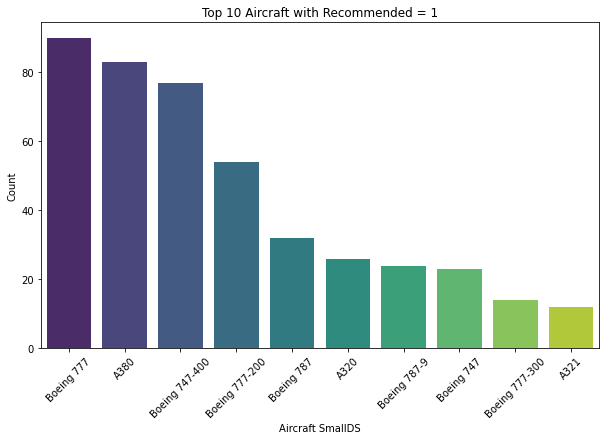

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_recommended_1 = df[df['Recommended'] == 1]

top_aircraft = df_recommended_1['Aircraft'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_aircraft.index, y=top_aircraft.values, palette='viridis')
plt.xlabel('Aircraft SmallDS')
plt.ylabel('Count')
plt.title('Top 10 Aircraft with Recommended = 1')
plt.xticks(rotation=45)
plt.show()

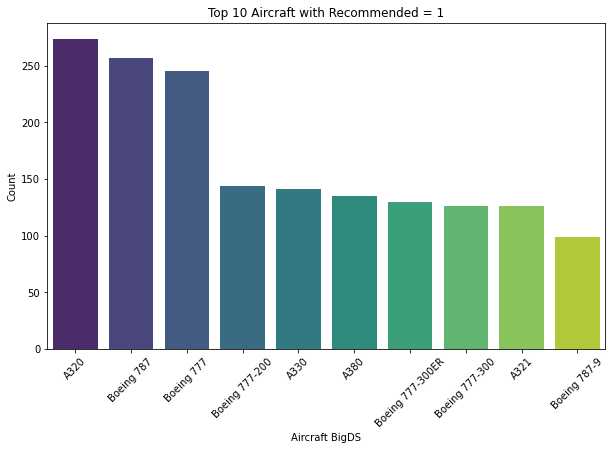

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_recommended_1_10k = df_10k[df_10k['Recommended'] == 1]

top_aircraft = df_recommended_1_10k['Aircraft'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_aircraft.index, y=top_aircraft.values, palette='viridis')
plt.xlabel('Aircraft BigDS')
plt.ylabel('Count')
plt.title('Top 10 Aircraft with Recommended = 1')
plt.xticks(rotation=45)
plt.show()

# Sự tương quan giữa điểm đánh giá trung bình với Recommended

In [21]:
def plot_grouped_box(df,feat_x,feat_y,filename):
    plt.figure(figsize=(6,6))
    sns.set(style="whitegrid")
    ax = sns.catplot(data=df, x=feat_x, y=feat_y, kind='box', palette='Set2')
    ax.set(xlabel=feat_x, ylabel=feat_y)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    return

<Figure size 432x432 with 0 Axes>

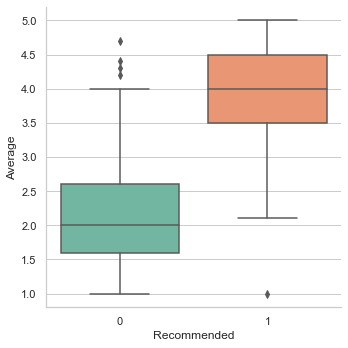

In [22]:
feat_x = 'Recommended'
feat_y = 'Average'
plot_grouped_box(df,feat_x,feat_y,'./Box-'+feat_x+'-'+feat_y+'.png')

In [30]:
threshold = 4.0
high_average_low_recommended = df.loc[(df['Average'] > threshold) & (df['Recommended'] == 0)]
high_average_low_recommended

,Aircraft,Cabin Staff Service,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Route,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity,Average
176,NaN,5,December 2020,5.0,5,5.0,0,Sofia to London Heathrow,5,Economy Class,Solo Leisure,3,5.0,4.7
716,A380 and Boeing 747,5,April 2017,3.0,5,4.0,0,London Heathrow to Miami,4,First Class,Couple Leisure,5,NaN,4.3
1023,Boeing 787,5,July 2016,5.0,5,5.0,0,KUL to LHR,5,Business Class,Business,1,5.0,4.4
1301,A320 / Boeing 787,3,September 2015,5.0,3,5.0,0,DUS to PHL via LHR,5,Premium Economy,Business,4,NaN,4.2


<Figure size 432x432 with 0 Axes>

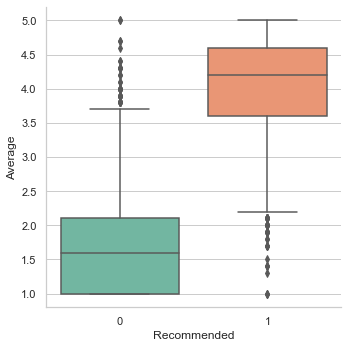

In [23]:
feat_x = 'Recommended'
feat_y = 'Average'
plot_grouped_box(df_10k,feat_x,feat_y,'./Box-'+feat_x+'-'+feat_y+'.png')

# Sự tương quan giữa Seat Type với điểm đánh giá trung bình

<Figure size 432x432 with 0 Axes>

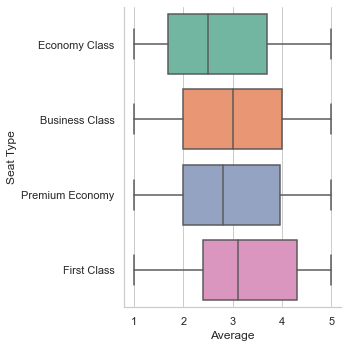

In [24]:
feat_x = 'Average'
feat_y = 'Seat Type'
plot_grouped_box(df,feat_x,feat_y,'./Box-'+feat_x+'-'+feat_y+'.png')

<Figure size 432x432 with 0 Axes>

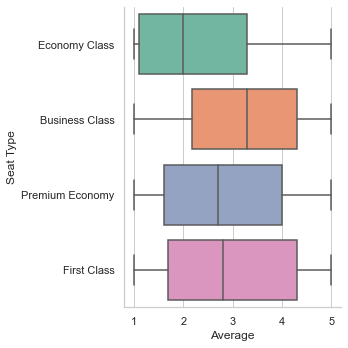

In [25]:
feat_x = 'Average'
feat_y = 'Seat Type'
plot_grouped_box(df_10k,feat_x,feat_y,'./Box-'+feat_x+'-'+feat_y+'.png')

# Sự tương quan giữa Type Of Traveller với điểm đánh giá trung bình

<Figure size 432x432 with 0 Axes>

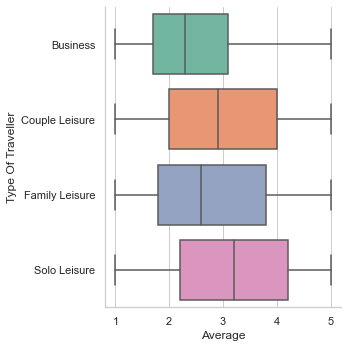

In [26]:
feat_x = 'Average'
feat_y = 'Type Of Traveller'
plot_grouped_box(df,feat_x,feat_y,'./Box-'+feat_x+'-'+feat_y+'.png')

<Figure size 432x432 with 0 Axes>

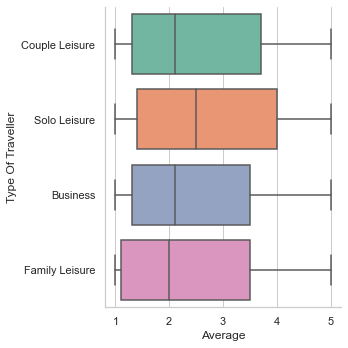

In [27]:
feat_x = 'Average'
feat_y = 'Type Of Traveller'
plot_grouped_box(df_10k,feat_x,feat_y,'./Box-'+feat_x+'-'+feat_y+'.png')

### Sự tương quan giữa các Rating với Recommended của SmallDS

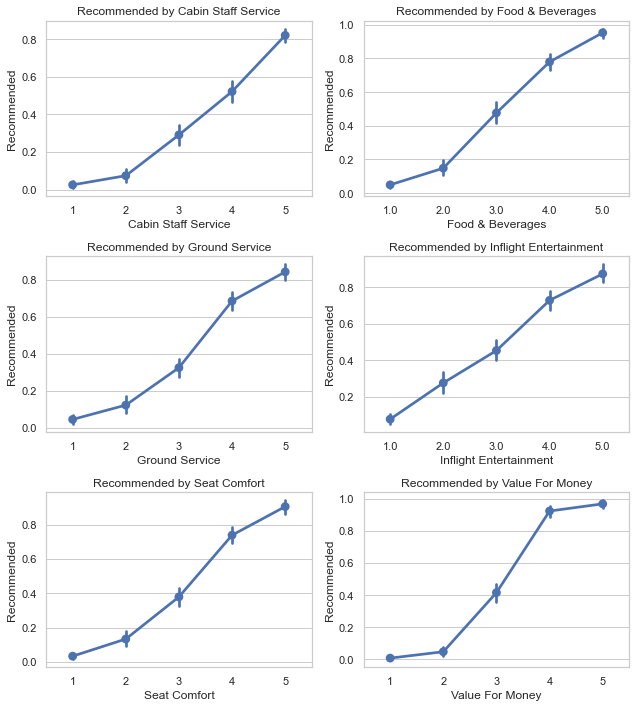

In [28]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(9, 10))

ax0 = fig.add_subplot(axs[0, 0])
sns.pointplot(x='Cabin Staff Service', y='Recommended', data=df, ax=ax0)
ax0.set_xlabel('Cabin Staff Service')
ax0.set_ylabel('Recommended')
ax0.set_title(f'Recommended by Cabin Staff Service')

ax0 = fig.add_subplot(axs[0, 1])
sns.pointplot(x='Food & Beverages', y='Recommended', data=df, ax=ax0)
ax0.set_xlabel('Food & Beverages')
ax0.set_ylabel('Recommended')
ax0.set_title(f'Recommended by Food & Beverages')

ax0 = fig.add_subplot(axs[1, 0])
sns.pointplot(x='Ground Service', y='Recommended', data=df, ax=ax0)
ax0.set_xlabel('Ground Service')
ax0.set_ylabel('Recommended')
ax0.set_title(f'Recommended by Ground Service')

ax0 = fig.add_subplot(axs[1, 1])
sns.pointplot(x='Inflight Entertainment', y='Recommended', data=df, ax=ax0)
ax0.set_xlabel('Inflight Entertainment')
ax0.set_ylabel('Recommended')
ax0.set_title(f'Recommended by Inflight Entertainment')

ax0 = fig.add_subplot(axs[2, 0])
sns.pointplot(x='Seat Comfort', y='Recommended', data=df, ax=ax0)
ax0.set_xlabel('Seat Comfort')
ax0.set_ylabel('Recommended')
ax0.set_title(f'Recommended by Seat Comfort')

ax0 = fig.add_subplot(axs[2, 1])
sns.pointplot(x='Value For Money', y='Recommended', data=df, ax=ax0)
ax0.set_xlabel('Value For Money')
ax0.set_ylabel('Recommended')
ax0.set_title(f'Recommended by Value For Money')

plt.tight_layout()
plt.show()

### Sự tương quan giữa các Rating với Recommended của BigDS

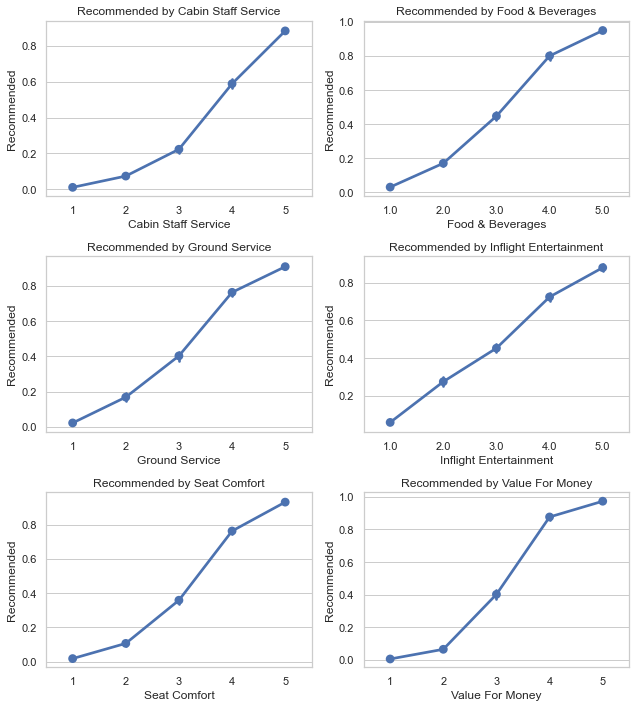

In [29]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(9, 10))

ax0 = fig.add_subplot(axs[0, 0])
sns.pointplot(x='Cabin Staff Service', y='Recommended', data=df_10k, ax=ax0)
ax0.set_xlabel('Cabin Staff Service')
ax0.set_ylabel('Recommended')
ax0.set_title(f'Recommended by Cabin Staff Service')

ax0 = fig.add_subplot(axs[0, 1])
sns.pointplot(x='Food & Beverages', y='Recommended', data=df_10k, ax=ax0)
ax0.set_xlabel('Food & Beverages')
ax0.set_ylabel('Recommended')
ax0.set_title(f'Recommended by Food & Beverages')

ax0 = fig.add_subplot(axs[1, 0])
sns.pointplot(x='Ground Service', y='Recommended', data=df_10k, ax=ax0)
ax0.set_xlabel('Ground Service')
ax0.set_ylabel('Recommended')
ax0.set_title(f'Recommended by Ground Service')

ax0 = fig.add_subplot(axs[1, 1])
sns.pointplot(x='Inflight Entertainment', y='Recommended', data=df_10k, ax=ax0)
ax0.set_xlabel('Inflight Entertainment')
ax0.set_ylabel('Recommended')
ax0.set_title(f'Recommended by Inflight Entertainment')

ax0 = fig.add_subplot(axs[2, 0])
sns.pointplot(x='Seat Comfort', y='Recommended', data=df_10k, ax=ax0)
ax0.set_xlabel('Seat Comfort')
ax0.set_ylabel('Recommended')
ax0.set_title(f'Recommended by Seat Comfort')

ax0 = fig.add_subplot(axs[2, 1])
sns.pointplot(x='Value For Money', y='Recommended', data=df_10k, ax=ax0)
ax0.set_xlabel('Value For Money')
ax0.set_ylabel('Recommended')
ax0.set_title(f'Recommended by Value For Money')

plt.tight_layout()
plt.show()